## Introduction to Data Wrangling

This course is about getting data read so that anything created is built on a solid foundation. 

In many contexts, uncleaned or poorly cleaned data can lead to major impacts. In a drug company, for instance, data wrangling can be literally life or death. 

There are three steps to data wrangling:
1. Gather
2. Assess
3. Clean

### 1. Gathering Data

Gathering is sometimes called acquiring or collecting data.

The steps of the gathering process can vary. Common data sources:

1. Files
2. Database
3. Scraped off of website
4. Application programming interface (API) which allows us to programmatically access data

While files can be downloaded manually, best practices dictates it is actually better to download files programmatically, i.e., with code. There are two reasons for that: scalability and reproducibility.

#### Unzip File
[Zipfile](https://docs.python.org/3/library/zipfile.html) documentation.

In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# extract all contents from zip file
with zipfile.ZipFile('support-files/01_Intro-to-DW/archive.zip', 'r') as myzip:
    myzip.extractall('support-files/01_Intro-to-DW')

Nice tip: shift+tab shows the signature of the function!

In [3]:
df = pd.read_csv('support-files/01_Intro-to-DW/online-job-postings.csv')
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


### 2. Assessing Data

#### Data Quality
Low quality data is commonly referred to as dirty data. Dirty data has issues with its content. 

Data quality is a perception or an assessment of data's fitness to serve its purpose in a given context.

Common data quality issues:
- Missing Data, like a missing value
- Invalid data, like a cell having an impossible value
- Inaccurate data
- Inconsistent data, like using different units

#### Tidiness
Untidy data is commonly referred to as "messy" data. Messy data has issues with its structure.

This [article](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) by Hadley Wickham illustrates the importance of tidy data. This [one](http://www.jeannicholashould.com/tidy-data-in-python.html) from Jean-Nicholas Hould discusses Tidy Data in Python. 

### Visual vs. Programmatic Assessment
We can either visually try to spot any issues or do it programatically. 

Then, we make notes of what's wrong to correct those issues during the cleaning step. 

#### Visual Assessment

In [4]:
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


#### Programmatic Assessment

Four common programatic assessments in `pandas`:
- head
- tail
- info
- value_counts

In [5]:
# display basic summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [6]:
# display the first five rows of the df
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [7]:
# display the last five rows of the df
df.tail()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False
19000,"""Kamurj"" UCO CJSC\r\n\r\n\r\nTITLE: Lawyer in...","Dec 30, 2015",Lawyer in Legal Department,"""Kamurj"" UCO CJSC",NaN,Full-time,NaN,NaN,NaN,Indefinite,...,NaN,All qualified applicants are encouraged to\r\n...,30 December 2015,20 January 2016,NaN,"""Kamurj"" UCO CJSC is providing micro and small...",NaN,2015,12,False


In [8]:
# display the entry counts for the Year column 
df['Year'].value_counts()

2012    2149
2013    2009
2015    2009
2014    1983
2008    1785
2011    1697
2007    1538
2010    1511
2009    1191
2005    1138
2006    1116
2004     875
Name: Year, dtype: int64

### Is this dataset tidy?
**No!**

For tidy data, we need:

- each variable is a column
- each observation is a row
- each type of observational unit is a table

In our dataset, we have:
- Duplicate representation of year and month. There is a column named `date`, but we also have `Month` and `Year`. Ideally, we should have a column for each: day, month and year. 
- Two types of observational units in this dataset: job posting data and company data. To make this tidy, we would have two tables: Job Posting data with everything except the `AboutC` and then a second Company table with only the `Company` column and an `AboutC` (About Company) column.

### Assessments

#### Visual
As part of the visual assessment, we can see that we need to deal with:
- Missing values (NaNs)
- StartDate inconsistencies (ASAP, Immediately)

The '\' followed by letters are called `escape constructs` and they help structure text in webpages. It's good to preserve the original posting structure, so there's no make note of any issues regarding this column. 

#### Programmatic
- Nondescriptive column headers (ApplicationP, AboutC, RequiredQual)
- Typo in the `JobRequirement` column

> Tip: Assessments should actually not include verbs and instead should only be observations of issues with the data, i.e., "Nondescriptive column headers." Verbs come into play when defining cleaning operations.

> Tip: It is best if you document all your assessments at the very bottom of the Assess section in the data wrangling template, i.e., directly above the Clean heading. Referring to them when defining cleaning operations is easier this way and prevents hectic scrolling.

### 3. Cleaning Data

Cleaning means acting on the assessments we made to improve quality and tidiness.

Examples of Improving Quality
- Correcting when inaccurate
- Removing when irrelevant
- Replacing when missing
- Combining, like concatenating the missing rows

#### The Programmatic Data Cleaning Process
Manually cleaning is inefficient and error-prone. Cleaning is best done programmatically.

The data cleaning steps are:
1. **Define:** Defining means defining a data cleaning plan in writing
2. **Code:** Coding means translating these definitions to code and executing that code
3. **Test:** Testing means testing our dataset, often using code, to make sure our cleaning operations worked.

#### Issue 1 

#### Define:
- Select all records in the StartDate column that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP".

#### Code:

> Tip: it's good practice to make a copy of the original DataFrame before cleaning!

In [9]:
df_clean = df.copy()

In [10]:
df_clean['StartDate'].value_counts()

ASAP                              4754
Immediately                        773
As soon as possible                543
Upon hiring                        261
Immediate                          259
                                  ... 
Flexible                             1
11 April 2010                        1
ASAP starting 10 February 2006       1
07 April 2010                        1
15 March 2009                        1
Name: StartDate, Length: 1186, dtype: int64

In [11]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

for phrase in asap_list:
    df_clean['StartDate'].replace(to_replace=phrase, value='ASAP', inplace=True)

#### Test:

Before standardization, there were only `4754` entries of "ASAP", now there are `6856`.

In [12]:
df_clean['StartDate'].value_counts()

ASAP                 6856
01 September 2012      31
March 2006             27
November 2006          22
January 2010           19
                     ... 
Flexible                1
11 April 2010           1
3-21 July 2006          1
07 April 2010           1
25 March 2009           1
Name: StartDate, Length: 1140, dtype: int64

Another type of programmatic testing are assert statements

In [13]:
for phrase in asap_list:
    assert phrase not in df_clean['StartDate'].values 
    # if we don't use .values, pandas will check to see if each
    # phrase is in the index column of df_clean['StartDate']
    # instead of its actual values 

#### Issue 2

#### Define:
- Select all nondescriptive and misspelled column headers ApplicationP, AboutC, RequiredQual, JobRequirment) and replace those with full words (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement).

#### Code:

In [14]:
df_clean.rename(columns={"ApplicationP": "ApplicationProcedure", 
                         "AboutC": "AboutCompany", 
                         "RequiredQual": "RequiredQualifications", 
                         "JobRequirment": "JobRequirement"}, inplace=True)

#### Test:

In [15]:
# column names have been successfully changed!
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   Title                   18973 non-null  object
 3   Company                 18994 non-null  object
 4   AnnouncementCode        1208 non-null   object
 5   Term                    7676 non-null   object
 6   Eligibility             4930 non-null   object
 7   Audience                640 non-null    object
 8   StartDate               9675 non-null   object
 9   Duration                10798 non-null  object
 10  Location                18969 non-null  object
 11  JobDescription          15109 non-null  object
 12  JobRequirement          16479 non-null  object
 13  RequiredQualifications  18517 non-null  object
 14  Salary                  9622 non-null   object
 15  Ap

### Data Wrangling is an Iterative Process
We've gathered, assessed, and cleaned our data. Are we done? No. After cleaning, we always reassess and then iterate on any of the steps if we need to. If we're happy with the quality and tidiness of our data, we can end our wrangling process and move on to storing our clean data, or analyzing, visualizing, or modeling it.

#### Storing Data
It's optional, but it's important if you need to use the cleaned data in the future. [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) on how to save a cleaned DataFrame to csv.

In [16]:
# the code works, but I'm not going to run it because the file is large (almost 100mb!)
# df_clean.to_csv('support-files/01_Intro-to-DW/online-job-postings-cleaned.csv', index=False)

### Analysis and Visualization

#### Example: Job Postings with ASAP Start Dates

In [17]:
# number of 'asap' start dates
asap_counts = df_clean.query('StartDate == "ASAP"').count()[0]
asap_counts

6856

In [18]:
# total number of job postings (non-empty counts)
non_empty = df_clean['StartDate'].count()
non_empty

9675

In [19]:
# percentage of positions with an urgente start, i.e., 'ASAP'
asap_counts / non_empty

0.7086304909560723

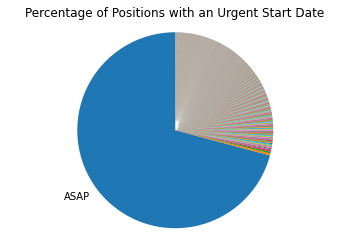

In [20]:
sizes = df_clean['StartDate'].value_counts()
labels = np.full(len(df_clean['StartDate'].value_counts()), "", dtype=object)
labels[0] = 'ASAP'


fig, ax = plt.subplots()
ax.pie(x=sizes, labels=labels, startangle=90)
ax.axis('equal')
plt.title("Percentage of Positions with an Urgent Start Date");

What would this chart look like **before** data wrangling?

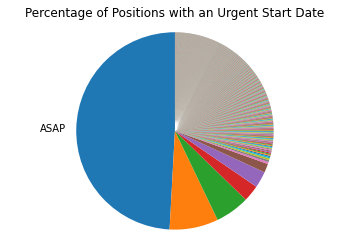

In [21]:
sizes = df['StartDate'].value_counts()
labels = np.full(len(df['StartDate'].value_counts()), "", dtype=object)
labels[0] = 'ASAP'


fig, ax = plt.subplots()
ax.pie(x=sizes, labels=labels, startangle=90)
ax.axis('equal')
plt.title("Percentage of Positions with an Urgent Start Date");

Before we standardized the Start Date column, only approximately half of those job postings were ASAP.

These two charts illustrate why data wrangling is important! 

In [22]:
# playing with the data to define a function instead of repeating code

def pie_chart(DataFrame):
    sizes = DataFrame['StartDate'].value_counts()
    labels = np.full(len(DataFrame['StartDate'].value_counts()), "", dtype=object)
    labels[0] = 'ASAP'

    fig, ax = plt.subplots()
    ax.pie(x=sizes, labels=labels, startangle=90)
    ax.axis('equal')
    plt.title("Percentage of Positions with an Urgent Start Date");

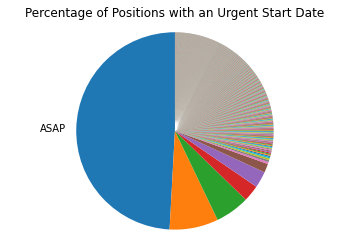

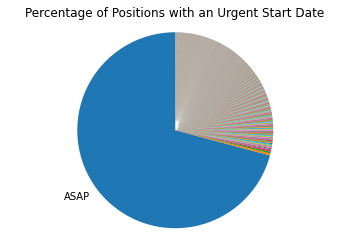

In [23]:
# before and after data wrangling
pie_chart(df), pie_chart(df_clean);